# Data Exploration 

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("modern_RAPTOR_by_team.csv")


In [229]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           7289 non-null   object 
 1   player_id             7289 non-null   object 
 2   season                7289 non-null   int64  
 3   season_type           7289 non-null   object 
 4   team                  7289 non-null   object 
 5   poss                  7289 non-null   int64  
 6   mp                    7289 non-null   int64  
 7   raptor_box_offense    7287 non-null   float64
 8   raptor_box_defense    7287 non-null   float64
 9   raptor_box_total      7287 non-null   float64
 10  raptor_onoff_offense  7287 non-null   float64
 11  raptor_onoff_defense  7287 non-null   float64
 12  raptor_onoff_total    7287 non-null   float64
 13  raptor_offense        7289 non-null   float64
 14  raptor_defense        7289 non-null   float64
 15  raptor_total         

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [230]:
df.shape

(7289, 23)

#### Raptor box offense, defense, and box total indicate how a players individual preformance predicts long term real adjusted plus minus or how many points a player adds or decreases to the teams lead

#### Raptor on/off offense, defense, and total evaluate how a players team preformed while he was on the floor and how they preformed while he was off the court. This stat indicates how much value a player brought in elevating his own teamates preformance.

# Data Cleaning

### Drop rows where the player played less then 500 minutes in a season as thats not enough playing time for valuable data

In [231]:
df['mp'].value_counts()
df = df.loc[df['mp'] > 500]
df.shape
df['mp'].value_counts()

mp
562     9
683     9
505     8
1326    7
984     7
       ..
995     1
2309    1
1035    1
1080    1
1082    1
Name: count, Length: 1734, dtype: int64

### Drop collums with stats that are not related to raptor spceficially

In [232]:
df = df[['player_name', 'player_id', 'season', "season_type", 'poss', 'mp', 
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total']]

### Round all the data to only two decimal places

In [233]:
to_round = ['raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total']

for col in to_round:
    df[col] = df[col].map(lambda value: round(value, 2))
# df.shape
# df.info()
df["raptor_box_defense"].value_counts()

raptor_box_defense
 0.48    15
 0.08    14
-0.17    14
 1.14    13
-0.76    13
         ..
-3.04     1
 4.41     1
-4.41     1
-2.86     1
-4.89     1
Name: count, Length: 854, dtype: int64

# Exploratory Data Analysis

## Univariate

### Range

In [234]:
numeric = df.select_dtypes("number")
numeric.max() - numeric.min()

season                     8.00
poss                    5533.00
mp                      2624.00
raptor_box_offense        18.70
raptor_box_defense        14.34
raptor_box_total          24.35
raptor_onoff_offense      30.26
raptor_onoff_defense      20.58
raptor_onoff_total        35.08
raptor_offense            19.88
raptor_defense            14.99
raptor_total              24.88
dtype: float64

### Mean 

In [235]:
numeric = df.select_dtypes("number")
round(numeric.mean(), 2)


season                  2018.02
poss                    2949.82
mp                      1433.55
raptor_box_offense        -0.13
raptor_box_defense         0.05
raptor_box_total          -0.07
raptor_onoff_offense      -0.15
raptor_onoff_defense       0.07
raptor_onoff_total        -0.08
raptor_offense            -0.14
raptor_defense             0.06
raptor_total              -0.08
dtype: float64

### Median

In [236]:
numeric = df.select_dtypes("number")
numeric.median()

season                  2018.000
poss                    2799.500
mp                      1359.500
raptor_box_offense        -0.370
raptor_box_defense         0.000
raptor_box_total          -0.200
raptor_onoff_offense      -0.290
raptor_onoff_defense      -0.005
raptor_onoff_total        -0.210
raptor_offense            -0.350
raptor_defense            -0.005
raptor_total              -0.220
dtype: float64

### Difference Between Mean and Median

In [237]:
numeric.mean() - numeric.median()

season                    0.022029
poss                    150.315942
mp                       74.052174
raptor_box_offense        0.244722
raptor_box_defense        0.051910
raptor_box_total          0.126710
raptor_onoff_offense      0.142191
raptor_onoff_defense      0.070470
raptor_onoff_total        0.127643
raptor_offense            0.211310
raptor_defense            0.061936
raptor_total              0.138261
dtype: float64

#### The mean of the data is slightly overinflated by a certain amount of way above average players

## Box Plot

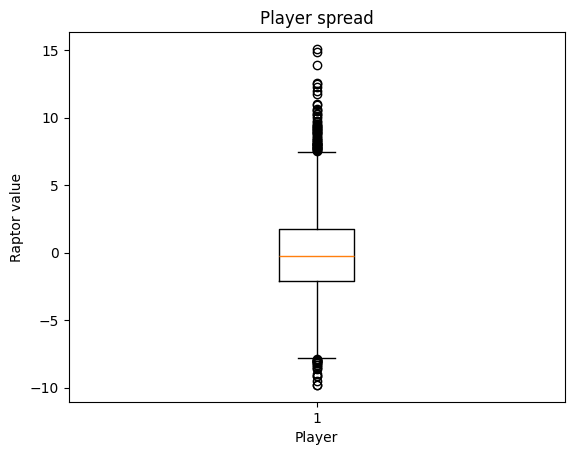

In [238]:
test_grades = pd.Series([65, 70, 100, 92, 25, 83, 76, 82, 65, 96])


# Create a boxplot
plt.boxplot(df["raptor_total"])
plt.title("Player spread")
plt.xlabel("Player")
plt.ylabel("Raptor value")
plt.show()

### Histogram

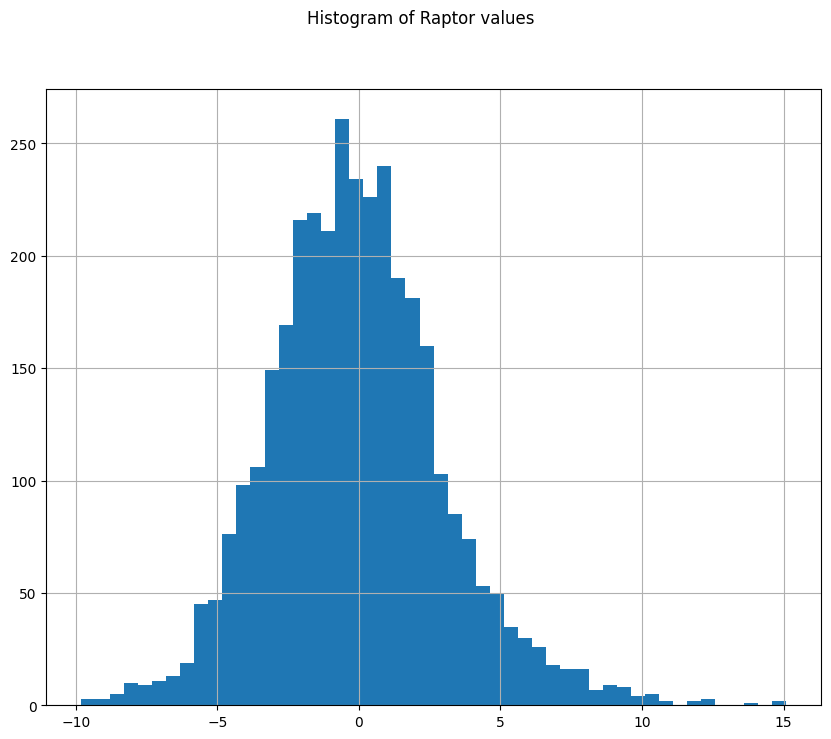

In [239]:
df["raptor_total"].hist(figsize=(10, 8), bins=50)

plt.suptitle("Histogram of Raptor values")

plt.show()

# Statistical Analysis

### How does the leagues overal regular season raptor compare to their playoff raptor?

In [240]:
playoffs = df.query("season_type == 'PO'")
regular_season = df.query("season_type == 'RS'")
playoffs_numeric = playoffs.select_dtypes("number")
regular_season_numeric = regular_season.select_dtypes("number")
playoffs_numeric.mean()
playoffs_numeric.mean() - regular_season_numeric.mean()






season                    -0.071363
poss                   -1726.073239
mp                      -817.631974
raptor_box_offense         2.510328
raptor_box_defense         1.192643
raptor_box_total           3.702949
raptor_onoff_offense       3.359293
raptor_onoff_defense       1.109615
raptor_onoff_total         4.468445
raptor_offense             2.777762
raptor_defense             1.202879
raptor_total               3.980386
dtype: float64

On average a players raptor total will increase by 3.9 in the playoffs compared to in the regular season

In [241]:
playoffs["raptor_total"].std() - regular_season["raptor_total"].std()

0.7513078532839175

Playoffs have a standard deviation of 0.75 more than regular seasosn displaying a bigger gap in preformancce betweeen players. 

## What were the best nba regular seasons and playoffs according to raptor?

In [242]:
max_r = regular_season["raptor_total"].max()
max_p = playoffs["raptor_total"].max()

df["raptor_total"] == max_r

# Best player in regular season
df.loc[df["raptor_total"] == max_r]

,player_name,player_id,season,season_type,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total
3599,Nikola Jokic,jokicni01,2022,RS,5130,2476,8.66,6.15,14.81,7.64,3.76,11.4,8.87,6.0,14.87


In [243]:
df.loc[df["raptor_total"] == max_p]

,player_name,player_id,season,season_type,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total
3592,Nikola Jokic,jokicni01,2019,PO,1086,557,8.77,5.44,14.21,3.74,11.0,14.74,8.15,6.93,15.08


Best playoffs was Jokic in 2019 and best regular seaons was Jokic in 2022

## What were the worst nba regular seasons and playoffs according to raptor?

In [244]:
min_r = regular_season["raptor_total"].min()
min_p = playoffs["raptor_total"].min()

df["raptor_total"] == min_r

# Worst player in regular season
df.loc[df["raptor_total"] == min_r]

,player_name,player_id,season,season_type,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total
6097,Kobi Simmons,simmoko01,2018,RS,1311,643,-3.95,-5.58,-9.54,-0.55,-7.95,-8.49,-3.43,-6.37,-9.8


In [245]:
df.loc[df["raptor_total"] == min_p]

,player_name,player_id,season,season_type,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total
4817,Marcus Morris,morrima03,2018,PO,1114,562,-3.09,-2.72,-5.81,-1.11,-2.87,-3.98,-2.87,-2.95,-5.83


Worst regular season was Kobi Simmons in 2018 and worst playoffs was was Marcus Moriss in 2018

## How does the general leagues offensive RAPTOR comapre to their defensvie RAPTOR?

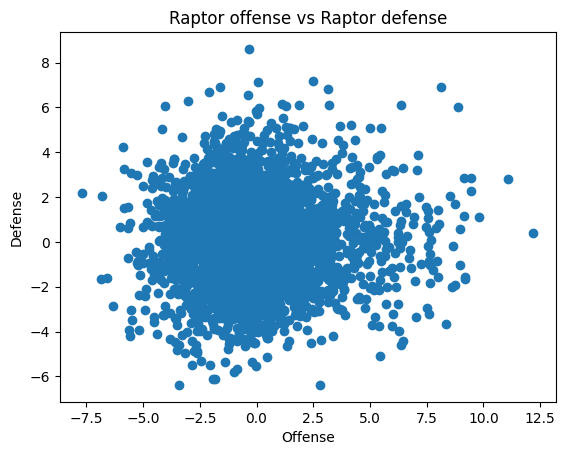

In [246]:
plt.scatter(df["raptor_offense"], df["raptor_defense"])



plt.title("Raptor offense vs Raptor defense")
plt.xlabel("Offense")
plt.ylabel("Defense")
plt.show()


Their are more players doing better on offense with higher values revealing its higher weight in a players total RAPTOR